In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from google.colab import drive

In [2]:
def initializer(x,x0,L,plucked):
    if(x<x0):
        return (x/x0)*plucked
    else:
        return ((L-x)/(L-x0))*plucked

yinit = np.vectorize(initializer)

def step(before,now,m):
    result = np.zeros(now.shape)
    for i in range(1,len(now)-1):
        result[i] = 2*now[i] - before[i] + m*(now[i+1] + now[i-1]-2*now[i] )
    return result

In [3]:
def stringsim(ID,L=100,x0=47,m = 0.8,y_max = 1,y_min = -1, intrvl = 20,frame = 1000,plucked=1):
  name = str(ID)
  x = np.linspace(0,L,100)
  y = yinit(x,x0,L,plucked)
  y_container= [y,step(y,y,m)]

  
  for i in range(1,frame):
    y_container.append(step(y_container[i-1],y_container[i],m))

  fig,ax = plt.subplots()
  line, = ax.plot(x,y)
  plt.ylim((y_min,y_max))
  
  fig.figsize=(8,8)
  plt.title("String simulation", fontsize = 20)
  plt.xlabel('Length of string [1]', fontsize = 20)
  plt.ylabel('Amplitude [1]', fontsize = 20)
  def animate(i):
    line.set_ydata(y_container[i])
    return line,

  def init():
    line.set_ydata(y)
    return line,    

  
  ani = animation.FuncAnimation(fig,animate,interval = intrvl,frames = frame)
  plt.grid()
  plt.show()
  ani.save("vids/"+name+ ".mp4")
  return y_container

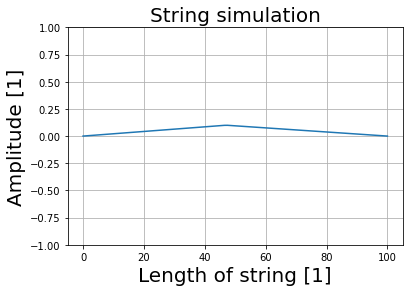

In [35]:
ID = 8
y = stringsim(ID,plucked=.1)

In [6]:
def splt(time,idx, ylim_min = -1,ylim_max = 1):
  plt.subplot(2,2,idx)
  plt.plot(y[time])
  plt.title("The string after " + str(time)+" step", fontsize = 20)
  plt.xlabel("Length of string", fontsize = 20)
  plt.ylabel('Amplitude', fontsize = 20)
  plt.grid()

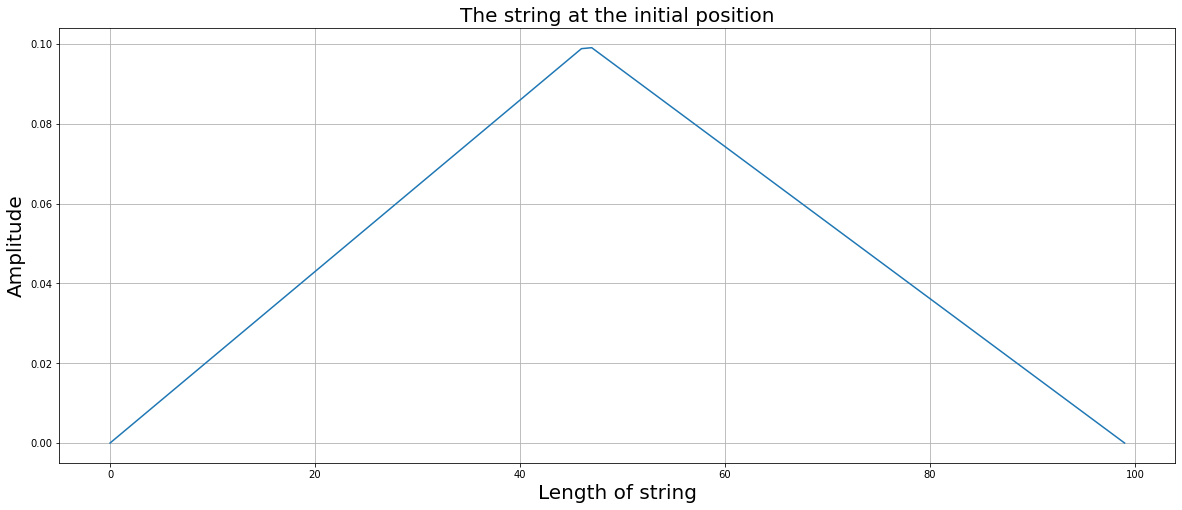

In [36]:
plt.figure(figsize=(20,8))
plt.plot(y[0])
plt.title("The string at the initial position", fontsize = 20)
plt.xlabel("Length of string", fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.grid()
plt.savefig('figs/'+str(ID)+"_init.png")

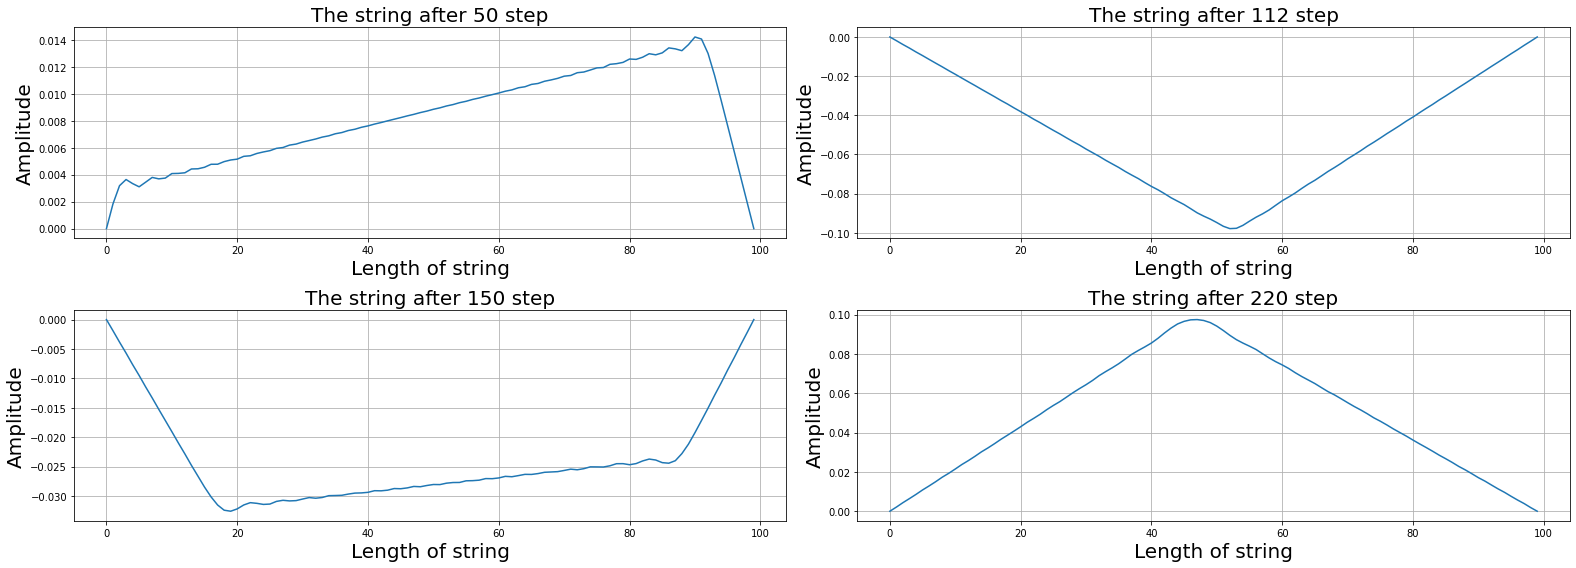

In [37]:
plt.figure(figsize=(22,8))
plt.ylim((1,-1))

splt(50,1)
splt(112,2)
splt(150,3)
splt(220,4)
plt.tight_layout()
plt.savefig("figs/"+str(ID)+".png")

In [38]:
drive.mount('/content/drive')

Mounted at /content/drive
